# **CNC MACHINE FAILURE PREDICTION PROJECT**

### **Author:** Hilal Selen Bütün
### **Date:** 2026-02-02






In [1]:
import pandas as pd
from google.colab import files
import io

uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"Success! '{file_name}' loaded successfully.")
print("DataFrame created. You can proceed with the analysis.")
print("-" * 30)
print(df.head())

Saving ai4i2020.csv to ai4i2020 (2).csv
Success! 'ai4i2020 (2).csv' loaded successfully.
DataFrame created. You can proceed with the analysis.
------------------------------
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7              

In [2]:

df.drop(['UDI', 'Product ID'], axis=1, inplace=True, errors='ignore')

df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df.rename(columns={
    'Air temperature [K]': 'Air_Temp',
    'Process temperature [K]': 'Process_Temp',
    'Rotational speed [rpm]': 'Speed',
    'Torque [Nm]': 'Torque',
    'Tool wear [min]': 'Tool_Wear',
    'Machine failure': 'Target'
}, inplace=True)

df.head()

,Type,Air_Temp,Process_Temp,Speed,Torque,Tool_Wear,Target,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
df['Type'] = df['Type'].map({'L': 1, 'M': 2, 'H': 3})

df.head()

,Type,Air_Temp,Process_Temp,Speed,Torque,Tool_Wear,Target,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


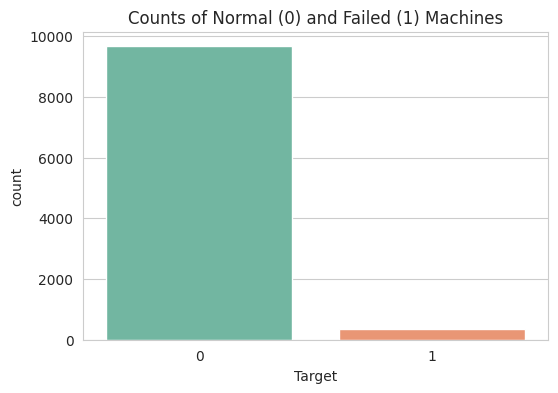

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df, hue='Target', legend=False, palette='Set2')
plt.title('Counts of Normal (0) and Failed (1) Machines')
plt.show()


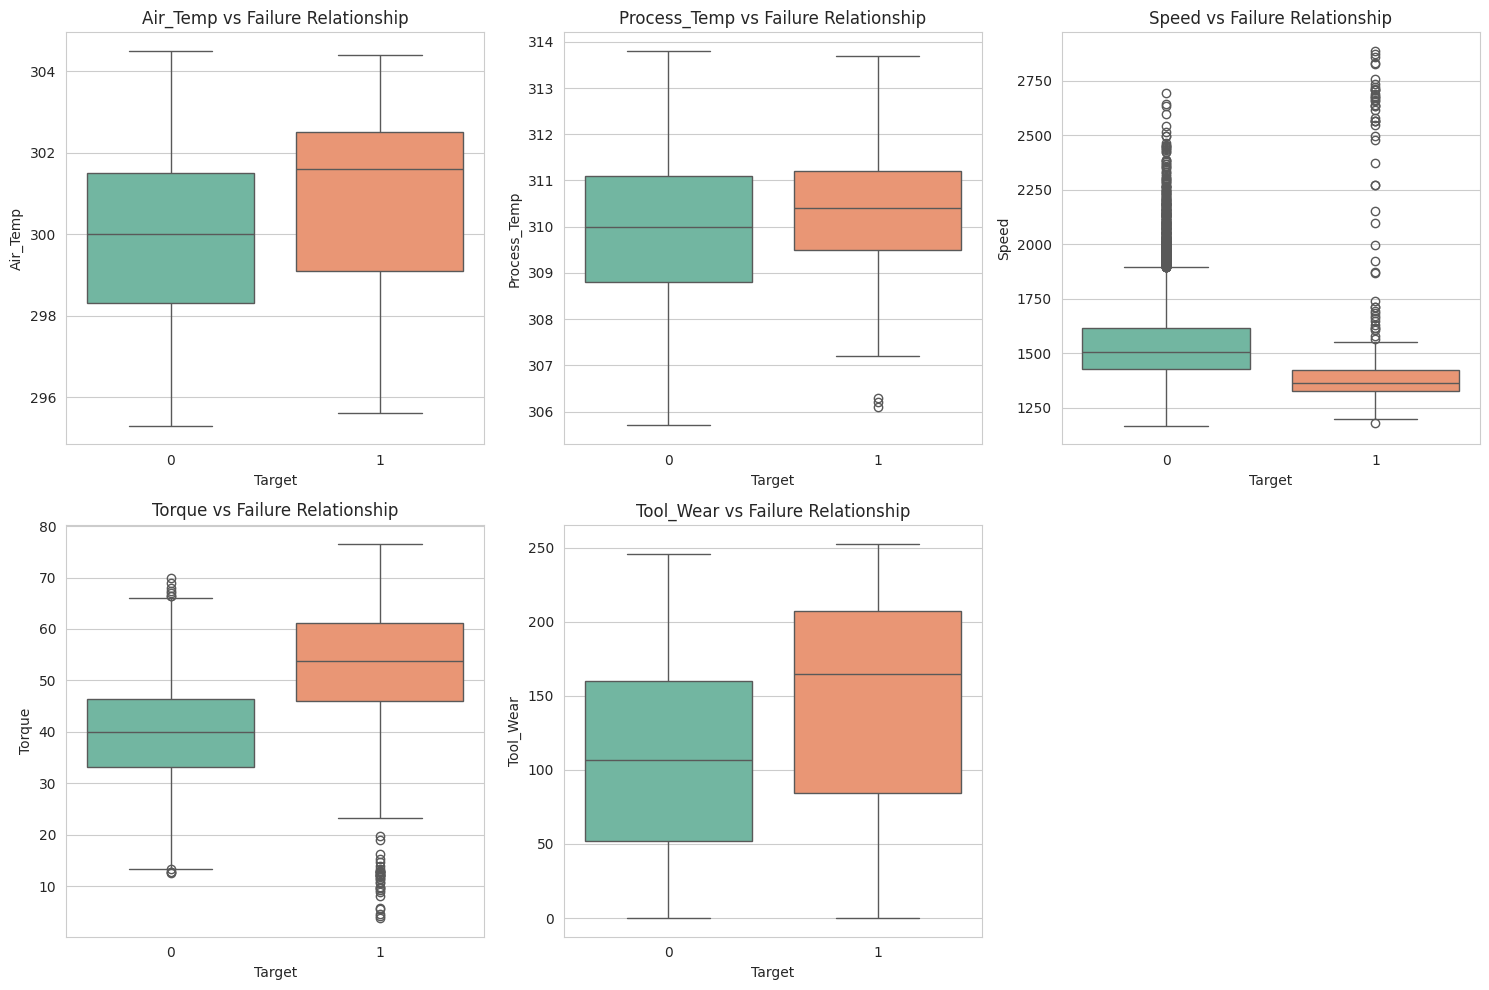

In [7]:
features = ['Air_Temp', 'Process_Temp', 'Speed', 'Torque', 'Tool_Wear']

plt.figure(figsize=(15, 10))

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Target', y=col, data=df, hue='Target', legend=False, palette='Set2')
    plt.title(f'{col} vs Failure Relationship')

plt.tight_layout()
plt.show()

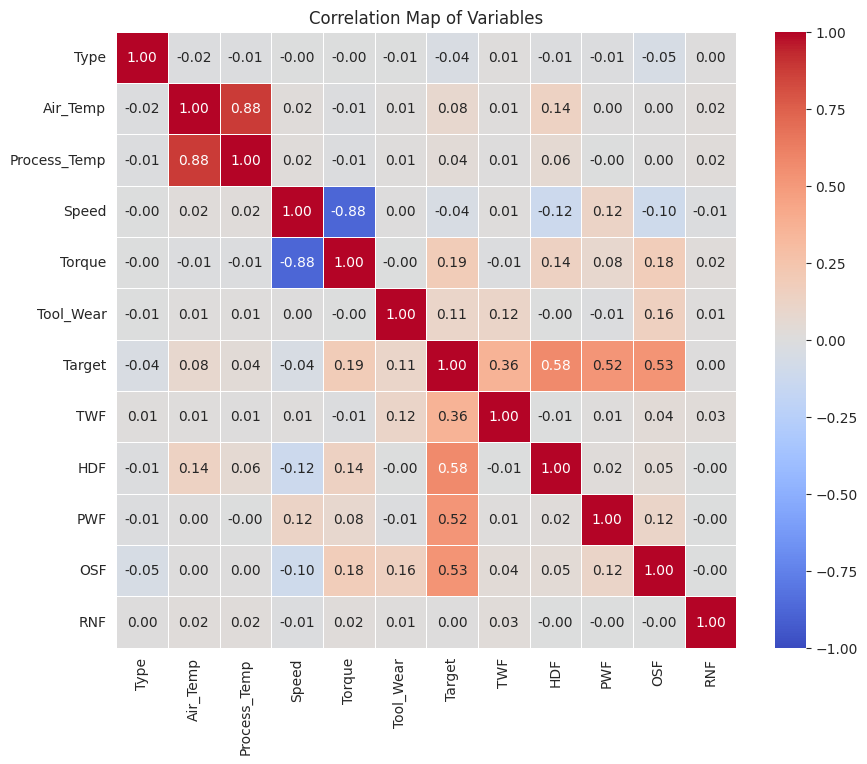

In [8]:
plt.figure(figsize=(10, 8))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Map of Variables')
plt.show()


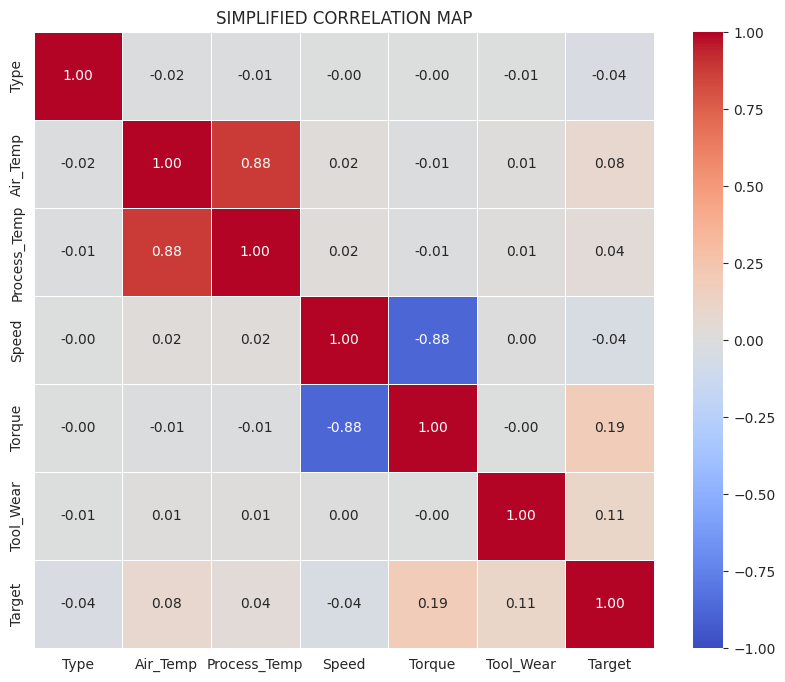

In [9]:
simplified_columns = ['Type', 'Air_Temp', 'Process_Temp', 'Speed', 'Torque', 'Tool_Wear', 'Target']

plt.figure(figsize=(10, 8))

simplified_correlation = df[simplified_columns].corr()

sns.heatmap(simplified_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

plt.title('SIMPLIFIED CORRELATION MAP')
plt.show()

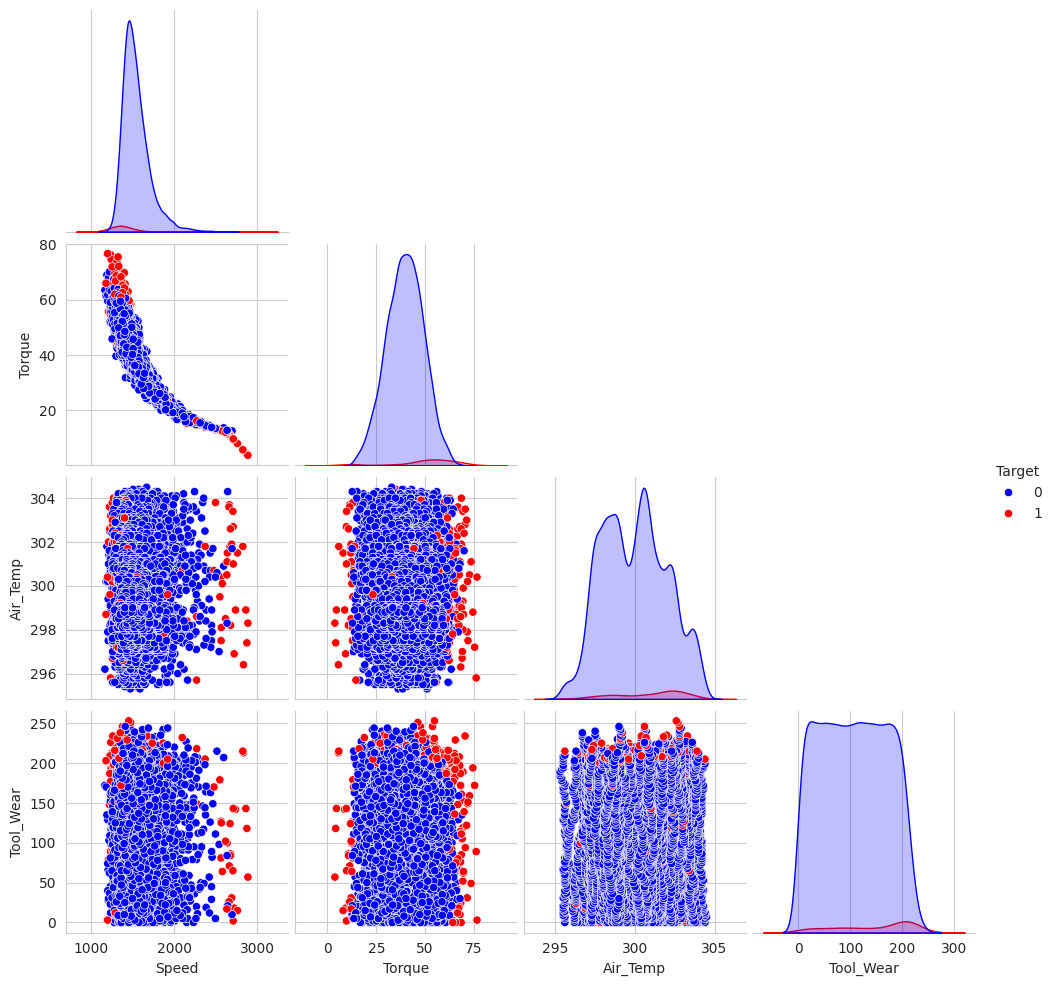

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

inspection_list = ['Speed', 'Torque', 'Air_Temp', 'Tool_Wear', 'Target']

sns.pairplot(df[inspection_list], hue='Target', palette={0:'blue', 1:'red'}, corner=True)

plt.show()

In [11]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['Target', 'Air_Temp', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

X = df.drop(columns=columns_to_drop)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Total Data Count: {len(df)}")
print(f"Training Data Count (Train): {len(X_train)}")
print(f"Testing Data Count (Test):   {len(X_test)}")

Total Data Count: 10000
Training Data Count (Train): 8000
Testing Data Count (Test):   2000


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=3000)

print("Training the model...")
model.fit(X_train, y_train)
print("Training completed. Predicting on test set...")


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

print(f"\n Model Accuracy Score: {accuracy * 100:.2f}%")

Training the model...
Training completed. Predicting on test set...

 Model Accuracy Score: 97.55%


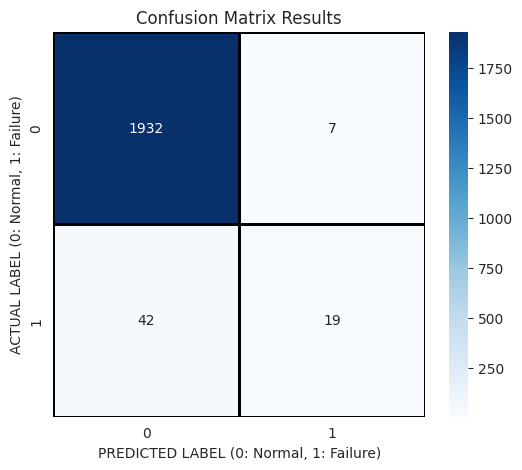

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.73      0.31      0.44        61

    accuracy                           0.98      2000
   macro avg       0.85      0.65      0.71      2000
weighted avg       0.97      0.98      0.97      2000



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, linecolor='black')

plt.title('Confusion Matrix Results')
plt.ylabel('ACTUAL LABEL (0: Normal, 1: Failure)')
plt.xlabel('PREDICTED LABEL (0: Normal, 1: Failure)')
plt.show()

print(classification_report(y_test, y_pred))

In [14]:


from imblearn.over_sampling import SMOTE

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

print("Scaling completed!")
print("Old Torque (Example): 42.8 -> New Torque: ", X_train[0][3])

Scaling completed!
Old Torque (Example): 42.8 -> New Torque:  -0.892696437200117


In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE (Original):", Counter(y_train))
print("After SMOTE (Resampled):", Counter(y_train_smote))

Before SMOTE (Original): Counter({0: 7722, 1: 278})
After SMOTE (Resampled): Counter({0: 7722, 1: 7722})


In [17]:
model_smote = LogisticRegression(random_state=42, max_iter=1000)

model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("--- RESULTS AFTER SMOTE ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

--- RESULTS AFTER SMOTE ---
Accuracy Score: 0.8

Confusion Matrix:
 [[1552  387]
 [  13   48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.89      1939
           1       0.11      0.79      0.19        61

    accuracy                           0.80      2000
   macro avg       0.55      0.79      0.54      2000
weighted avg       0.96      0.80      0.86      2000



In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train_smote, y_train_smote)

y_pred_tree = tree_model.predict(X_test)

print("--- DECISION TREE RESULTS ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


y_train_pred = tree_model.predict(X_train_smote)
print("\n--- OVERFITTING CHECK ---")
print("Training Set Accuracy:", accuracy_score(y_train_smote, y_train_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_tree))

--- DECISION TREE RESULTS ---
Accuracy Score: 0.9385

Confusion Matrix:
 [[1844   95]
 [  28   33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1939
           1       0.26      0.54      0.35        61

    accuracy                           0.94      2000
   macro avg       0.62      0.75      0.66      2000
weighted avg       0.96      0.94      0.95      2000


--- OVERFITTING CHECK ---
Training Set Accuracy: 1.0
Test Set Accuracy: 0.9385


In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test)

print("--- RANDOM FOREST RESULTS ---")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

y_train_pred_rf = rf_model.predict(X_train_smote)
print("\n--- OVERFITTING CHECK ---")
print("Training Set Accuracy:", accuracy_score(y_train_smote, y_train_pred_rf))
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_rf))

--- RANDOM FOREST RESULTS ---
Accuracy Score: 0.9425

Confusion Matrix:
 [[1842   97]
 [  18   43]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1939
           1       0.31      0.70      0.43        61

    accuracy                           0.94      2000
   macro avg       0.65      0.83      0.70      2000
weighted avg       0.97      0.94      0.95      2000


--- OVERFITTING CHECK ---
Training Set Accuracy: 1.0
Test Set Accuracy: 0.9425


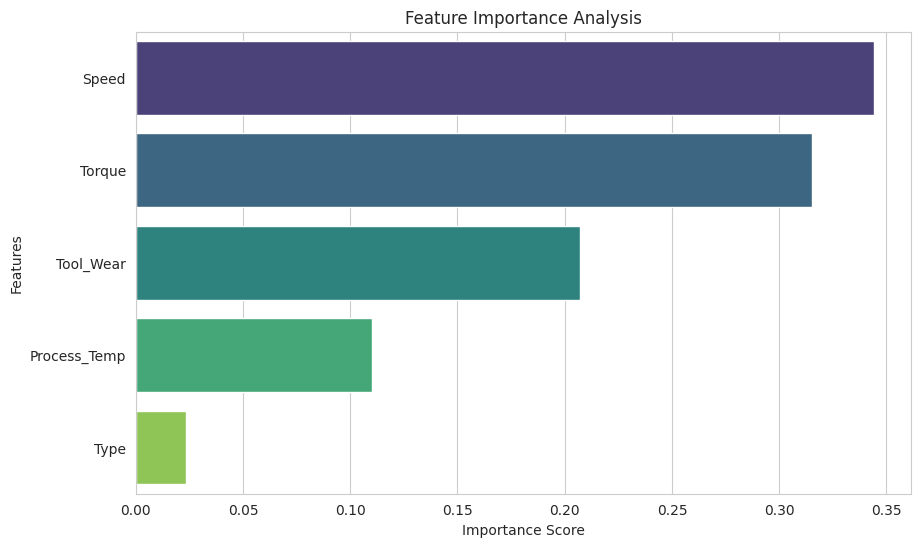

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, hue=feature_importances.index, legend=False, palette='viridis')
plt.title("Feature Importance Analysis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

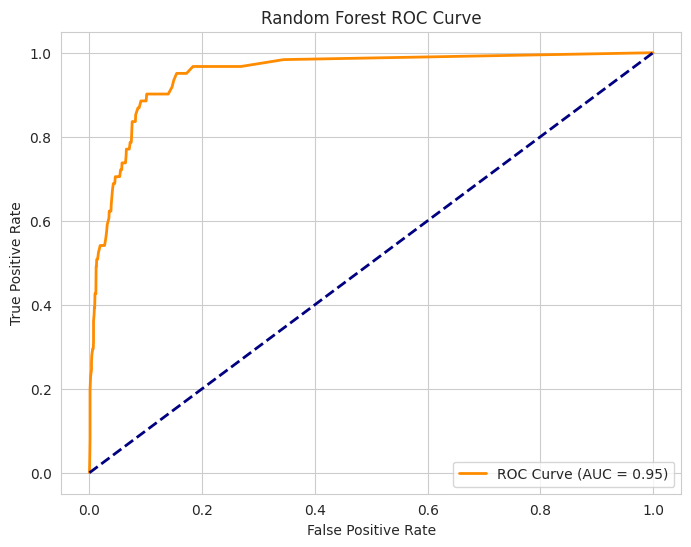

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

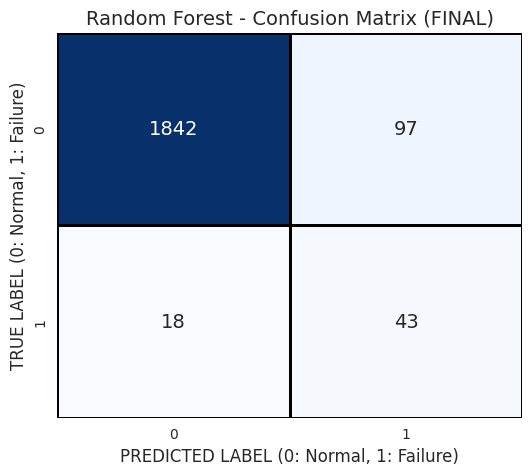

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

y_pred_final = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='black', annot_kws={"size": 14})

plt.title('Random Forest - Confusion Matrix (FINAL)', fontsize=14)
plt.ylabel('TRUE LABEL (0: Normal, 1: Failure)', fontsize=12)
plt.xlabel('PREDICTED LABEL (0: Normal, 1: Failure)', fontsize=12)

plt.savefig('Final_CM_English.png', dpi=300, bbox_inches='tight')
files.download('Final_CM_English.png')
plt.show()